# 1. Data processing

In [ ]:
import pandas as pd
import numpy as np
import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_product_info = pd.read_csv('/content/drive/MyDrive/DSO560 NLP/NLP Project/product_info.csv', encoding="utf-8")
review1 = pd.read_csv('/content/drive/MyDrive/DSO560 NLP/NLP Project/reviews_0-250.csv', encoding="utf-8")
review2 = pd.read_csv('/content/drive/MyDrive/DSO560 NLP/NLP Project/reviews_250-500.csv', encoding="utf-8")
review3 = pd.read_csv('/content/drive/MyDrive/DSO560 NLP/NLP Project/reviews_500-750.csv', encoding="utf-8")
review4 = pd.read_csv('/content/drive/MyDrive/DSO560 NLP/NLP Project/reviews_750-1250.csv', encoding="utf-8")
review5 = pd.read_csv('/content/drive/MyDrive/DSO560 NLP/NLP Project/reviews_1250-end.csv', encoding="utf-8")

# data_product_info = pd.read_csv('/content/product_info.csv', encoding="utf-8")
# review1 = pd.read_csv('/content/reviews_0-250.csv', encoding="utf-8")
# review2 = pd.read_csv('/content/reviews_250-500.csv', encoding="utf-8")
# review3 = pd.read_csv('/content/reviews_500-750.csv', encoding="utf-8")
# review4 = pd.read_csv('/content/reviews_750-1250.csv', encoding="utf-8")
# review5 = pd.read_csv('/content/reviews_1250-end.csv', encoding="utf-8")

reviews = pd.concat([review1, review2, review3, review4, review5])
# reviews = review1
reviews.shape

<ipython-input-5-c60f90eb5797>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review1 = pd.read_csv('/content/drive/MyDrive/DSO560 NLP/NLP Project/reviews_0-250.csv', encoding="utf-8")
<ipython-input-5-c60f90eb5797>:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review4 = pd.read_csv('/content/drive/MyDrive/DSO560 NLP/NLP Project/reviews_750-1250.csv', encoding="utf-8")
<ipython-input-5-c60f90eb5797>:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review5 = pd.read_csv('/content/drive/MyDrive/DSO560 NLP/NLP Project/reviews_1250-end.csv', encoding="utf-8")


(1094411, 19)

In [ ]:
reviews.head()

Unnamed: 0    author_id  rating  is_recommended  helpfulness  \
0           0   1741593524       5             1.0          1.0   
1           1  31423088263       1             0.0          NaN   
2           2   5061282401       5             1.0          NaN   
3           3   6083038851       5             1.0          NaN   
4           4  47056667835       5             1.0          NaN   

   total_feedback_count  total_neg_feedback_count  total_pos_feedback_count  \
0                     2                         0                         2   
1                     0                         0                         0   
2                     0                         0                         0   
3                     0                         0                         0   
4                     0                         0                         0   

  submission_time                                        review_text  \
0      2023-02-01  I use this with the Nudestix “Citrus Clean Bal...   
1      2023-03-21  I bought this lip mask after reading the revie...   
2      2023-03-21  My review title says it all! I get so excited ...   
3      2023-03-20  I’ve always loved this formula for a long time...   
4      2023-03-20  If you have dry cracked lips, this is a must h...   

                       review_title skin_tone eye_color    skin_type  \
0  Taught me how to double cleanse!       NaN     brown          dry   
1                      Disappointed       NaN       NaN          NaN   
2              New Favorite Routine     light     brown          dry   
3   Can't go wrong with any of them       NaN     brown  combination   
4                   A must have !!!     light     hazel  combination   

  hair_color product_id                                       product_name  \
0      black    P504322                     Gentle Hydra-Gel Face Cleanser   
1        NaN    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
2     blonde    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
3      black    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
4        NaN    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   

  brand_name  price_usd  
0   NUDESTIX       19.0  
1    LANEIGE       24.0  
2    LANEIGE       24.0  
3    LANEIGE       24.0  
4    LANEIGE       24.0

In [ ]:
data_product_info.head()

product_id               product_name  brand_id brand_name  loves_count  \
0    P473671    Fragrance Discovery Set      6342      19-69         6320   
1    P473668    La Habana Eau de Parfum      6342      19-69         3827   
2    P473662  Rainbow Bar Eau de Parfum      6342      19-69         3253   
3    P473660       Kasbah Eau de Parfum      6342      19-69         3018   
4    P473658  Purple Haze Eau de Parfum      6342      19-69         2691   

   rating  reviews            size                      variation_type  \
0  3.6364     11.0             NaN                                 NaN   
1  4.1538     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
2  4.2500     16.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
3  4.4762     21.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
4  3.2308     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   

  variation_value  ... online_only out_of_stock  sephora_exclusive  \
0             NaN  ...           1            0                  0   
1  3.4 oz/ 100 mL  ...           1            0                  0   
2  3.4 oz/ 100 mL  ...           1            0                  0   
3  3.4 oz/ 100 mL  ...           1            0                  0   
4  3.4 oz/ 100 mL  ...           1            0                  0   

                                          highlights  primary_category  \
0  ['Unisex/ Genderless Scent', 'Warm &Spicy Scen...         Fragrance   
1  ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   
2  ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   
3  ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   
4  ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   

   secondary_category  tertiary_category  child_count  child_max_price  \
0   Value & Gift Sets  Perfume Gift Sets            0              NaN   
1               Women            Perfume            2             85.0   
2               Women            Perfume            2             75.0   
3               Women            Perfume            2             75.0   
4               Women            Perfume            2             75.0   

   child_min_price  
0              NaN  
1             30.0  
2             30.0  
3             30.0  
4             30.0  

[5 rows x 27 columns]

In [ ]:
data_product_info.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [ ]:
#df = pd.merge( data_product_info,reviews, on='product_id', how = 'right')
df= reviews

In [ ]:
df

Unnamed: 0    author_id  rating  is_recommended  helpfulness  \
0               0   1741593524       5             1.0          1.0   
1               1  31423088263       1             0.0          NaN   
2               2   5061282401       5             1.0          NaN   
3               3   6083038851       5             1.0          NaN   
4               4  47056667835       5             1.0          NaN   
...           ...          ...     ...             ...          ...   
49972       49972   2276253200       5             1.0          NaN   
49973       49973  28013163278       5             1.0          NaN   
49974       49974   1539813076       5             1.0          NaN   
49975       49975   5595682861       5             1.0          NaN   
49976       49976  27666075558       5             1.0          NaN   

       total_feedback_count  total_neg_feedback_count  \
0                         2                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   
...                     ...                       ...   
49972                     0                         0   
49973                     0                         0   
49974                     0                         0   
49975                     0                         0   
49976                     0                         0   

       total_pos_feedback_count submission_time  \
0                             2      2023-02-01   
1                             0      2023-03-21   
2                             0      2023-03-21   
3                             0      2023-03-20   
4                             0      2023-03-20   
...                         ...             ...   
49972                         0      2023-03-13   
49973                         0      2023-03-13   
49974                         0      2023-03-13   
49975                         0      2023-03-13   
49976                         0      2023-03-13   

                                             review_text  \
0      I use this with the Nudestix “Citrus Clean Bal...   
1      I bought this lip mask after reading the revie...   
2      My review title says it all! I get so excited ...   
3      I’ve always loved this formula for a long time...   
4      If you have dry cracked lips, this is a must h...   
...                                                  ...   
49972  Consider salicylic acid your secret weapon for...   
49973  I’ve been using this as my only moisturizer fo...   
49974  I got breakouts whenever it’s my time of month...   
49975  I love this!!! I don’t get actual acne just an...   
49976  I have never tried anything from StriVectin bu...   

                           review_title skin_tone eye_color    skin_type  \
0      Taught me how to double cleanse!       NaN     brown          dry   
1                          Disappointed       NaN       NaN          NaN   
2                  New Favorite Routine     light     brown          dry   
3       Can't go wrong with any of them       NaN     brown  combination   
4                       A must have !!!     light     hazel  combination   
...                                 ...       ...       ...          ...   
49972                               NaN      fair     brown  combination   
49973                               NaN       NaN      blue  combination   
49974                               NaN     light      blue  combination   
49975                               NaN      fair     hazel         oily   
49976                   Amazing Product     light     green       normal   

      hair_color product_id  \
0          black    P504322   
1            NaN    P420652   
2         blonde    P420652   
3          black    P420652   
4            NaN    P420652   
...          ...        ...   
49972

In [ ]:
df_null = df.isnull().sum()
df_null

Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              167988
helpfulness                 561592
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1444
review_title                310654
skin_tone                   170539
eye_color                   209628
skin_type                   111557
hair_color                  226768
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd'],
      dtype='object')

In [ ]:
df_updated = df[['rating', 'review_text',
       'product_id']]

In [ ]:
df_updated.isnull().sum()

rating            0
review_text    1444
product_id        0
dtype: int64

In [ ]:
df_updated.dropna(inplace=True)

<ipython-input-53-5d7fb60fd479>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated.dropna(inplace=True)


In [ ]:
df_updated.isnull().sum()

rating         0
review_text    0
product_id     0
dtype: int64

In [ ]:
df_updated.shape

(1092967, 3)

In [ ]:
# # Shuffle the rows of the merged DataFrame
# df_updated = df_updated.sample(frac=1).reset_index(drop=True)
# df_updated = df_updated.iloc[:1000].copy()
# len(df_updated['product_id'].unique())

In [ ]:
# sample n
n=100
df_updated = df_updated.groupby('product_id').apply(lambda x: x.sample(n=min(len(x), n), random_state=42)).reset_index(drop=True)
df_updated.shape

<ipython-input-57-3adf2954d440>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_updated = df_updated.groupby('product_id').apply(lambda x: x.sample(n=min(len(x), n), random_state=42)).reset_index(drop=True)


(171551, 3)

In [ ]:
# products with 100 reviews only
review_counts = df_updated.groupby('product_id').size()
products_with_100 = review_counts[review_counts == 100].index
df_updated = df_updated[df_updated['product_id'].isin(products_with_100)]

In [ ]:
len(df_updated['product_id'].unique())

1392

In [ ]:
df_updated

rating                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             review_text product_id
0            5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             I can’t believe that I have seen results in less than 2 weeks! The circles under my eyes seem much lighter (even on those days with little sleep) and the texture seems smoother. And I get no smearing from my makeup when I wear this under my concealer.    P107306
1            5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Cute packaging I’m really impressed with the results what I’m seeing I actually don’t have alot of wrinkles but My eyes do look awake and fresh in the morning which I like. Can’t say much about the wrinkle thing.  10 on 10 for the packaging    P107306
2            5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Never before have I seen such positive results over such a short length of time! I generally have puffy under and over eyes with dark circles.  Within 36 hours the puffiness was dissipating and over two weeks, my eyes looked less tired from dark circles. Things only got better from there. I am a little scared as to how fast my eyes revert to their original state, however.  In the meantime, this is a wonderful product!    P107306
3            4  I’ve been using Murad’s “Essential-C Eye Cream SPF 15” for some time, but I’m al

# 2. Text pre-processing

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove digits and special characters (example)
    text = re.sub(r'[^a-zA-Z ]', '', text)  # Keep only letters and spaces

    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

df_updated['review_text'] = df_updated['review_text'].apply(preprocess_text)
# df_updated['cleaned_review_text'] = df_updated['review_text'].apply(preprocess_text)

In [ ]:
df_updated

rating                                        review_text product_id
0            5  cant believ seen result less week circl eye se...    P107306
1            5  cute packag im realli impress result im see ac...    P107306
2            5  never seen posit result short length time gene...    P107306
3            4  ive use murad essentialc eye cream spf time im...    P107306
4            4  dont think ive notic differ dark circl visibl ...    P107306
...        ...                                                ...        ...
171546       5  love cleanser one cleanser doesnt dri skin don...      P9941
171547       5  name product fit perfectli cleanser essenti pa...      P9941
171548       5  someon combin skin holi grail skincar refresh ...      P9941
171549       5  clear skin soon began use tri anoth one skin b...      P9941
171550       3  ive use cleanser year use love product past co...      P9941

[139200 rows x 3 columns]

#3. Topic modeling

2

# 4. Sentiment Analysis

In [ ]:
# VADER sentiment analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download("vader_lexicon")

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment
def get_sentiment_vader(text):
    if isinstance(text, str):  # Ensure it's a valid string
        score = sia.polarity_scores(text)["compound"]  # Compound score
        if score >= 0.05:
            return "Positive"
        elif score <= -0.05:
            return "Negative"
        else:
            return "Neutral"
    return "Neutral"

# Apply to reviews
df_updated["sentiment_vader"] = df_updated["review_text"].apply(get_sentiment_vader)

# Display results
df_updated[["review_text", "sentiment_vader"]].head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


review_text sentiment_vader
0  cant believ seen result less week circl eye se...        Negative
1  cute packag im realli impress result im see ac...        Positive
2  never seen posit result short length time gene...        Negative
3  ive use murad essentialc eye cream spf time im...        Positive
4  dont think ive notic differ dark circl visibl ...        Negative

In [ ]:
df_updated

rating                                        review_text product_id  \
0            5  cant believ seen result less week circl eye se...    P107306   
1            5  cute packag im realli impress result im see ac...    P107306   
2            5  never seen posit result short length time gene...    P107306   
3            4  ive use murad essentialc eye cream spf time im...    P107306   
4            4  dont think ive notic differ dark circl visibl ...    P107306   
...        ...                                                ...        ...   
171546       5  love cleanser one cleanser doesnt dri skin don...      P9941   
171547       5  name product fit perfectli cleanser essenti pa...      P9941   
171548       5  someon combin skin holi grail skincar refresh ...      P9941   
171549       5  clear skin soon began use tri anoth one skin b...      P9941   
171550       3  ive use cleanser year use love product past co...      P9941   

       sentiment_vader  
0             Negative  
1             Positive  
2             Negative  
3             Positive  
4             Negative  
...                ...  
171546        Positive  
171547        Positive  
171548        Positive  
171549        Negative  
171550        Positive  

[139200 rows x 4 columns]

In [ ]:
sentiment_counts = (
    df_updated
    # df_updated[df_updated['sentiment_vader'] != 'Neutral']
    .groupby(['product_id', 'sentiment_vader']) .size() .unstack(fill_value=0) )
sentiment_counts

sentiment_vader  Negative  Neutral  Positive
product_id                                  
P107306                12        9        79
P114902                 8        8        84
P12045                  9       11        80
P122651                11        8        81
P122661                 9       17        74
...                   ...      ...       ...
P94421                  9        8        83
P94812                  3        2        95
P9939                   3       10        87
P9940                   3        6        91
P9941                   2        6        92

[1392 rows x 3 columns]

In [ ]:

sentiment_counts['sentiment_score'] = sentiment_counts.get('Positive', 0) - sentiment_counts.get('Negative', 0)

sorted_sentiments = sentiment_counts.sort_values(by='sentiment_score', ascending=False)
sorted_sentiments

sentiment_vader  Negative  Neutral  Positive  sentiment_score
product_id                                                   
P500716                 0        0       100              100
P504026                 0        1        99               99
P503991                 0        1        99               99
P503936                 0        1        99               99
P445832                 0        1        99               99
...                   ...      ...       ...              ...
P450917                21        9        70               49
P402992                21       12        67               46
P385320                21       12        67               46
P460855                23       10        67               44
P461522                22       15        63               41

[1392 rows x 4 columns]

In [ ]:
# Top 10
top_10 = sorted_sentiments.nlargest(10, 'sentiment_score')

top_10 = top_10.merge(data_product_info[['product_id', 'product_name', 'brand_name', 'rating',
                                         'price_usd', 'highlights',  'primary_category',
                                         'secondary_category', 'tertiary_category']], on='product_id', how='left')
top_10

product_id  Negative  Neutral  Positive  sentiment_score  \
0    P500716         0        0       100              100   
1    P504026         0        1        99               99   
2    P503991         0        1        99               99   
3    P503936         0        1        99               99   
4    P445832         0        1        99               99   
5    P503657         1        0        99               98   
6    P500471         1        0        99               98   
7    P483679         1        0        99               98   
8    P469213         1        0        99               98   
9    P484067         1        0        99               98   

                                        product_name          brand_name  \
0                                 10 Day Results Kit            Algenist   
1            Mini Algae + Moringa Universal Face Oil                MARA   
2       Algae + Moringa Universal Hydrating Face Oil                MARA   
3  Black Tea Anti-Aging Moisturizer with Retinol-...               fresh   
4                   Acne Clearing Skin Wash Cleanser         Dermalogica   
5  Premier Cru Skin Barrier Rich Moisturizer with...            Caudalie   
6                        Brume de Beauté Beauty Mist               Gucci   
7  Truth Barrier Booster Orange Ferment Vitamin C...        OLEHENRIKSEN   
8               Wrinkle Blur Bakuchiol Eye Gel Crème        OLEHENRIKSEN   
9                  Evercalm Barrier Support Face Oil  REN Clean Skincare   

   rating  price_usd                                         highlights  \
0  4.8023       88.0  ['Vegan', 'Good for: Loss of firmness', 'Good ...   
1  4.9009       40.0  ['Vegan', 'Good for: Dullness/Uneven Texture',...   
2  4.9009       72.0  ['Vegan', 'Plumping', 'Clean + Planet Positive...   
3  4.8434       95.0  ['Cream Formula', 'Good for: Dullness/Uneven T...   
4  4.6303       42.0  ['Salicylic Acid', 'Good for: Acne/Blemishes',...   
5  4.5665      129.0  ['Vegan', 'Refill Available', 'Good for: Dulln...   
6  4.6652       78.0  ['Radiant Finish', 'Hyaluronic Acid', 'Hydrati...   
7  4.8140       48.0                  ['Vitamin C', 'Clean at Sephora']   
8  4.3939       52.0  ['Good for: Dark Circles', 'Good for: Loss of ...   
9  4.8391       60.0  ['Vegan', 'Good for: Redness', 'Good for: Loss...   

  primary_category secondary_category        tertiary_category  
0         Skincare  Value & Gift Sets                      NaN  
1         Skincare       Moisturizers                Face Oils  
2         Skincare       Moisturizers                Face Oils  
3         Skincare       Moisturizers             Moisturizers  
4         Skincare          Cleansers    Face Wash & Cleansers  
5         Skincare       Moisturizers             Moisturizers  
6         Skincare       Moisturizers         Mists & Essences  
7         Skincare       Moisturizers         Mists & Essences  
8         Skincare           Eye Care  Eye Creams & Treatments  
9         Skincare       Moisturizers                Face Oils

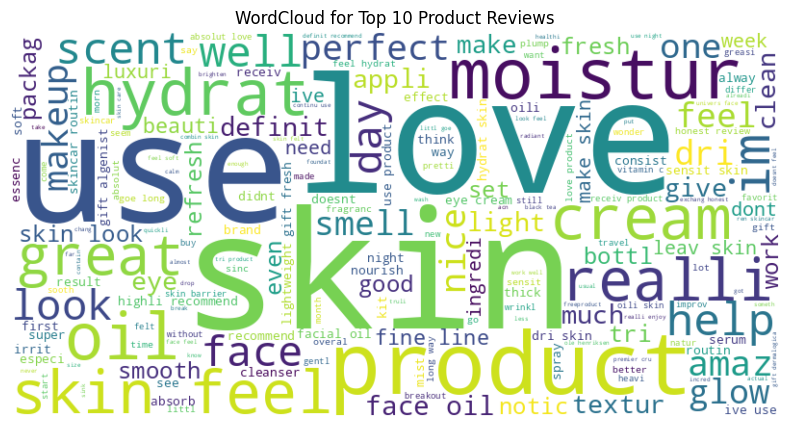

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

top10_reviews = df_updated[df_updated['product_id'].isin(top_10['product_id'])]
text = " ".join(top10_reviews['review_text'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Top 10 Product Reviews")
plt.show()


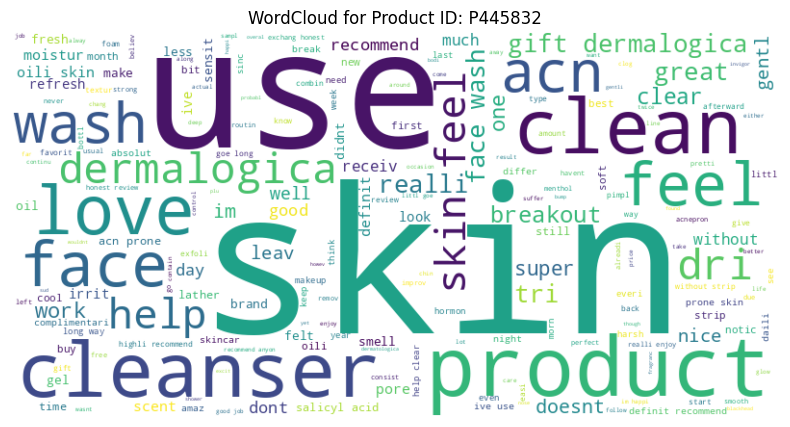

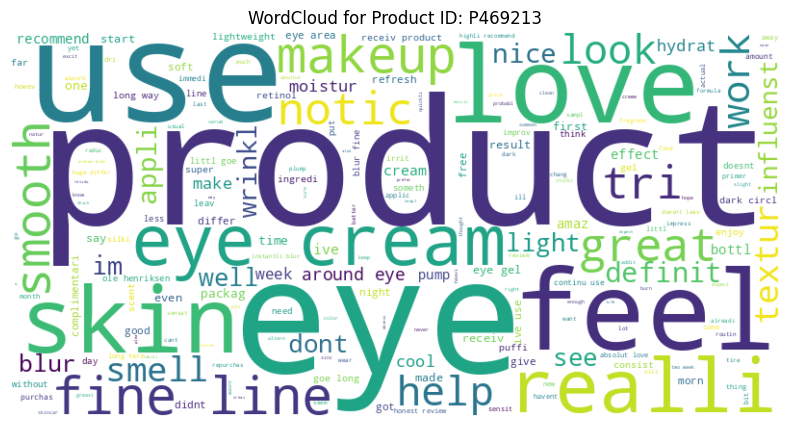

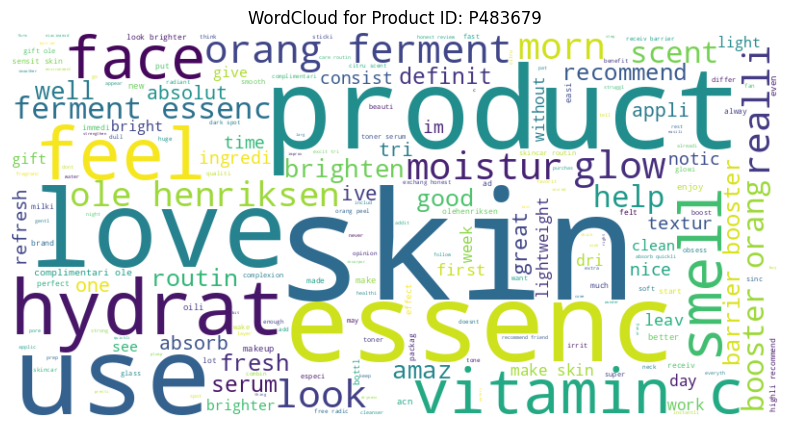

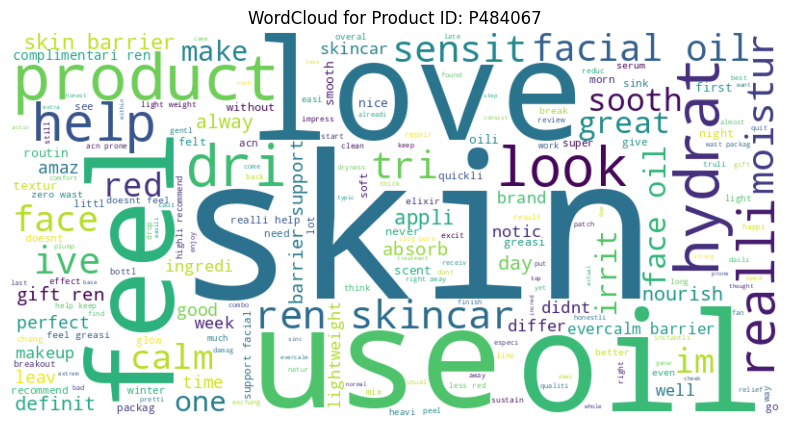

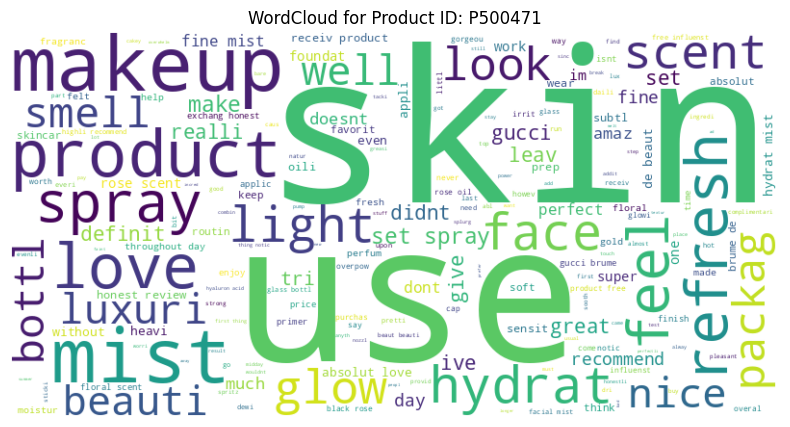

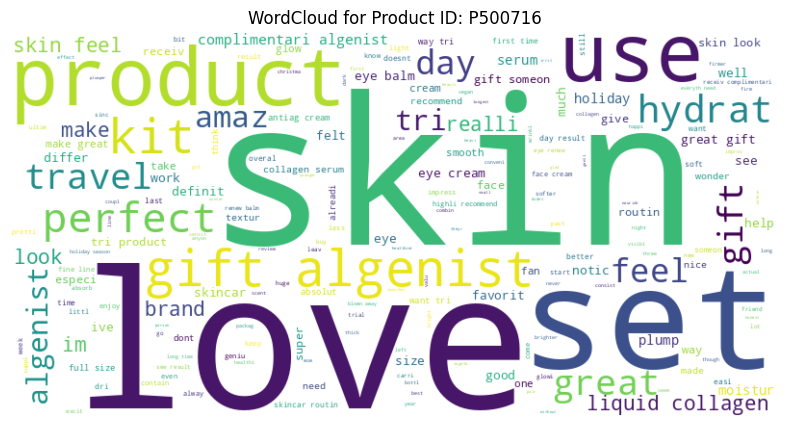

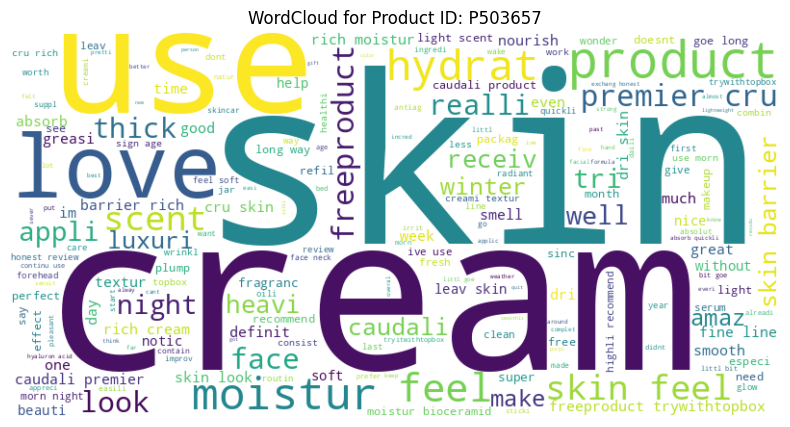

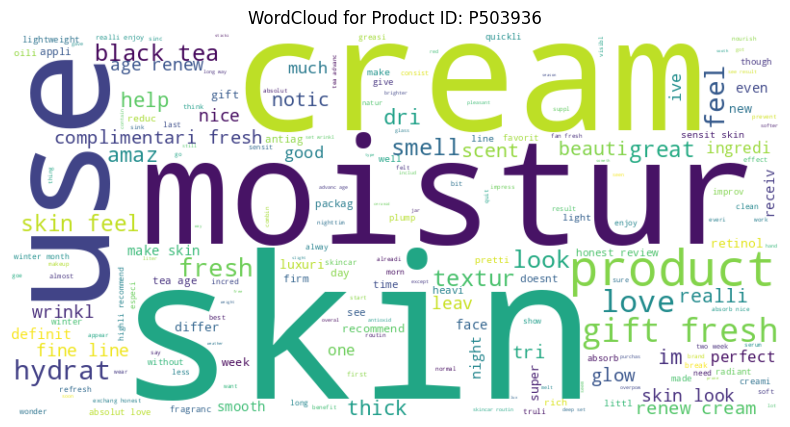

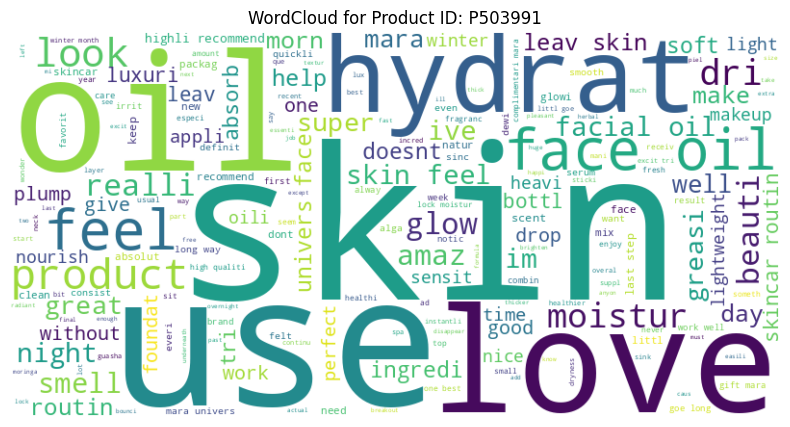

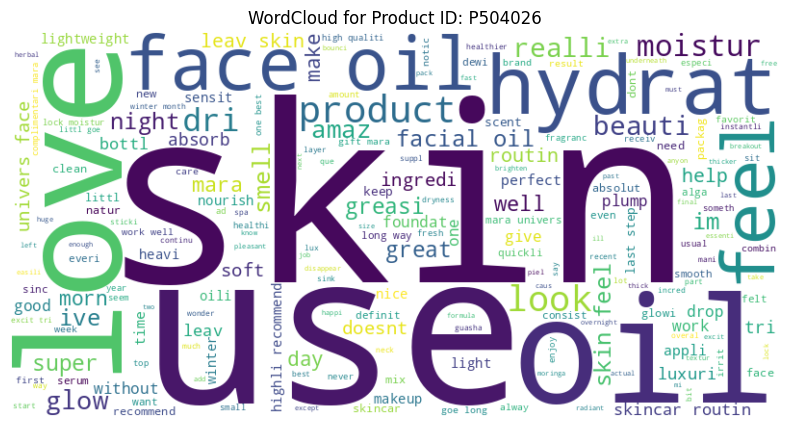

In [ ]:
# Iterate over each unique product_id and create a word cloud
for product in top10_reviews['product_id'].unique():
    # Combine all non-null review texts for the current product_id
    reviews_text = " ".join(top10_reviews[top10_reviews['product_id'] == product]['review_text'].dropna().tolist())

    # Generate the word cloud for the current product
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for Product ID: {product}")
    plt.show()

In [ ]:
# Worst 10
worst_10 = sorted_sentiments.nsmallest(10, 'sentiment_score')

worst_10 = worst_10.merge(data_product_info[['product_id', 'product_name', 'brand_name', 'rating',
                                         'price_usd', 'highlights',  'primary_category',
                                         'secondary_category', 'tertiary_category']], on='product_id', how='left')
worst_10

product_id  Negative  Neutral  Positive  sentiment_score  \
0    P461522        22       15        63               41   
1    P460855        23       10        67               44   
2    P402992        21       12        67               46   
3    P385320        21       12        67               46   
4    P377561        21        9        70               49   
5    P450917        21        9        70               49   
6    P443829        22        6        72               50   
7    P283106        17       15        68               51   
8      P7365        20        8        72               52   
9    P476447        19       10        71               52   

                                        product_name          brand_name  \
0                          Clean Charcoal Nose Strip  SEPHORA COLLECTION   
1                             Clean Lip Balm & Scrub  SEPHORA COLLECTION   
2   Trinity + Eye and Lip Enhancer Attachment Bundle              NuFACE   
3   Trinity + Eye and Lip Enhancer Attachment Bundle              NuFACE   
4                         FIRMx Exfoliating Peel Gel   Peter Thomas Roth   
5                    Mini FIRMx Exfoliating Peel Gel   Peter Thomas Roth   
6   Glow Clear, Color Correcting Self-Tanning Mousse    Isle of Paradise   
7          Instant FIRMx Eye Temporary Eye Tightener   Peter Thomas Roth   
8            Pure Skin Clarifying Dietary Supplement               Murad   
9  Debloat+ Anti-Bloat Supplement with Digestive ...         The Nue Co.   

   rating  price_usd                                         highlights  \
0  3.0273        3.0  ['Vegan', 'Good for: Pores', 'Clean at Sephora...   
1  2.2820        7.0                                                NaN   
2  3.4381      429.0                                                NaN   
3  3.4381      449.0  ['Good for: Anti-Aging', 'Good for: Loss of fi...   
4  4.5391       49.0  ['Good for: Dullness/Uneven Texture', 'Hyaluro...   
5  4.5391       16.0  ['Good for: Dullness/Uneven Texture', 'Hyaluro...   
6  3.4289       32.0  ['Hydrating', 'Customizable', 'Cruelty-Free', ...   
7  3.3254       38.0  ['Good for: Anti-Aging', 'Good for: Loss of fi...   
8  4.0723       50.0                                                NaN   
9  4.2651       45.0  ['Vegan', 'Clean + Planet Positive', 'Gluten F...   

  primary_category      secondary_category        tertiary_category  
0         Skincare                   Masks              Sheet Masks  
1         Skincare  Lip Balms & Treatments                      NaN  
2         Skincare         High Tech Tools               Anti-Aging  
3         Skincare         High Tech Tools               Anti-Aging  
4         Skincare              Treatments             Facial Peels  
5         Skincare               Mini Size                      NaN  
6         Skincare            Self Tanners                 For Body  
7         Skincare                Eye Care  Eye Creams & Treatments  
8         Skincare                Wellness       Beauty Supplements  
9         Skincare                Wellness       Beauty Supplements

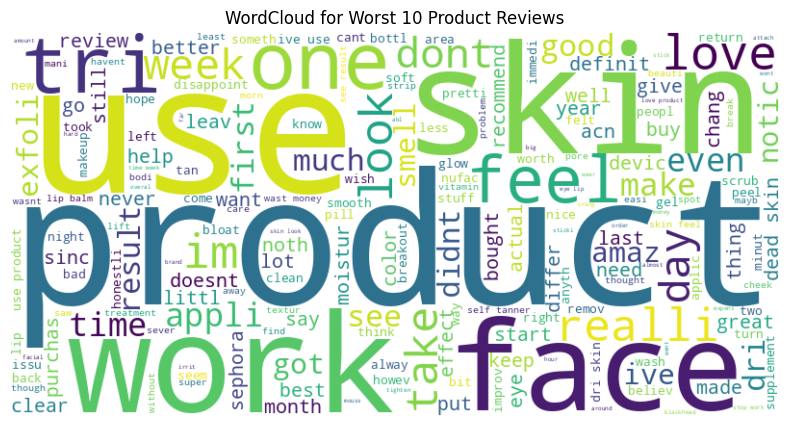

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

worst10_reviews = df_updated[df_updated['product_id'].isin(worst_10['product_id'])]
text = " ".join(worst10_reviews['review_text'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Worst 10 Product Reviews")
plt.show()


In [ ]:
# Iterate over each unique product_id and create a word cloud
for product in top10_reviews['product_id'].unique():
    # Combine all non-null review texts for the current product_id
    reviews_text = " ".join(top10_reviews[top10_reviews['product_id'] == product]['review_text'].dropna().tolist())

    # Generate the word cloud for the current product
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for Product ID: {product}")
    plt.show()

In [ ]:
from textblob import TextBlob

def get_sentiment_textblob(text):
    if isinstance(text, str):  # Ensure it's a valid string
        score = TextBlob(text).sentiment.polarity  # Polarity score
        if score > 0:
            return "Positive"
        elif score < 0:
            return "Negative"
        else:
            return "Neutral"
    return "Neutral"

# Apply to reviews
df_updated["sentiment_textblob"] = df_updated["review_text"].apply(get_sentiment_textblob)

# Display results
df_updated[["review_text", "sentiment_textblob"]].head()


review_text sentiment_textblob
0  cant believ seen result less week circl eye se...           Positive
1  cute packag im realli impress result im see ac...           Positive
2  never seen posit result short length time gene...           Positive
3  ive use murad essentialc eye cream spf time im...           Positive
4  dont think ive notic differ dark circl visibl ...           Negative

In [ ]:
sentiment_textblob_counts = (
    df_updated
    # df_updated[df_updated['sentiment_vader'] != 'Neutral']
    .groupby(['product_id', 'sentiment_textblob']) .size() .unstack(fill_value=0) )
sentiment_textblob_counts

sentiment_textblob  Negative  Neutral  Positive
product_id                                     
P107306                   17       11        72
P114902                   10       11        79
P12045                     5       16        79
P122651                    8       16        76
P122661                   12        7        81
...                      ...      ...       ...
P94421                    13        6        81
P94812                     4        3        93
P9939                      5       14        81
P9940                      4        6        90
P9941                      4        7        89

[1392 rows x 3 columns]

In [ ]:
sentiment_textblob_counts['sentiment_score'] = sentiment_textblob_counts.get('Positive', 0) - sentiment_textblob_counts.get('Negative', 0)

sorted_sentiments_textblob = sentiment_textblob_counts.sort_values(by='sentiment_score', ascending=False)
sorted_sentiments_textblob

sentiment_textblob  Negative  Neutral  Positive  sentiment_score
product_id                                                      
P467945                    0        0       100              100
P468850                    0        0       100              100
P455236                    0        1        99               99
P469537                    1        0        99               98
P476009                    1        0        99               98
...                      ...      ...       ...              ...
P470259                   32        7        61               29
P484080                   32        7        61               29
P472052                   33       11        56               23
P205614                   36        8        56               20
P374841                   40        6        54               14

[1392 rows x 4 columns]

In [ ]:
df_updated

rating                                        review_text product_id  \
0            5  cant believ seen result less week circl eye se...    P107306   
1            5  cute packag im realli impress result im see ac...    P107306   
2            5  never seen posit result short length time gene...    P107306   
3            4  ive use murad essentialc eye cream spf time im...    P107306   
4            4  dont think ive notic differ dark circl visibl ...    P107306   
...        ...                                                ...        ...   
171546       5  love cleanser one cleanser doesnt dri skin don...      P9941   
171547       5  name product fit perfectli cleanser essenti pa...      P9941   
171548       5  someon combin skin holi grail skincar refresh ...      P9941   
171549       5  clear skin soon began use tri anoth one skin b...      P9941   
171550       3  ive use cleanser year use love product past co...      P9941   

       sentiment_vader sentiment_textblob  
0             Negative           Positive  
1             Positive           Positive  
2             Negative           Positive  
3             Positive           Positive  
4             Negative           Negative  
...                ...                ...  
171546        Positive           Positive  
171547        Positive           Positive  
171548        Positive           Positive  
171549        Negative           Positive  
171550        Positive           Positive  

[139200 rows x 5 columns]

In [ ]:
# Top 10
top_10_textblob = sorted_sentiments_textblob.nlargest(10, 'sentiment_score')

top_10_textblob = top_10_textblob.merge(data_product_info[['product_id', 'product_name', 'brand_name', 'rating',
                                         'price_usd', 'highlights',  'primary_category',
                                         'secondary_category', 'tertiary_category']], on='product_id', how='left')
top_10_textblob

product_id  Negative  Neutral  Positive  sentiment_score  \
0    P467945         0        0       100              100   
1    P468850         0        0       100              100   
2    P455236         0        1        99               99   
3    P469537         1        0        99               98   
4    P476009         1        0        99               98   
5    P500633         1        0        99               98   
6    P500618         1        0        99               98   
7    P471793         1        0        99               98   
8    P505054         1        1        98               97   
9    P482025         1        1        98               97   

                                        product_name         brand_name  \
0             Capture Totale Super Potent Rich Cream               Dior   
1                              Signature Moisturizer   ROSE Ingleton MD   
2                              Glow Lip Pop Lip Balm        Glow Recipe   
3                              Bestsellers Trial Kit          Sulwhasoo   
4   Radiant Reveal Clean Brightening Vitamin C Serum           ROSE INC   
5  Tea Elixir Niacinamide & Hyaluronic Acid Anti-...              fresh   
6                     Turmeric Glow Foaming Cleanser      KORA Organics   
7                     Omega + Complex Cleansing Balm     Paula's Choice   
8               The POREfessional Speedy Smooth Mask  Benefit Cosmetics   
9                     Absolue Rich Cream Moisturizer            Lancôme   

   rating  price_usd                                         highlights  \
0  4.5457      130.0  ['Best for Dry Skin', 'Good for: Anti-Aging', ...   
1  4.7000       85.0  ['Hyaluronic Acid', 'Good for: Loss of firmnes...   
2  4.5778       22.0  ['Hydrating', 'Natural Finish', 'Clean + Plane...   
3  4.7020       58.0  ['Good for: Dullness/Uneven Texture', 'Hydrati...   
4  4.6687       74.0  ['Vegan', 'Good for: Dullness/Uneven Texture',...   
5  4.7724       80.0  ['Hyaluronic Acid', 'Clean at Sephora', 'Good ...   
6  4.6111       44.0  ['Vegan', 'Good for: Dullness/Uneven Texture',...   
7  4.6667       29.0  ['Good for: Dullness/Uneven Texture', 'Best fo...   
8  4.7134       39.0  ['Good for: Dullness/Uneven Texture', 'Good fo...   
9  4.8031      270.0  ['Good for: Loss of firmness', 'Hydrating', 'G...   

  primary_category      secondary_category      tertiary_category  
0         Skincare            Moisturizers           Moisturizers  
1         Skincare            Moisturizers           Moisturizers  
2         Skincare  Lip Balms & Treatments                    NaN  
3         Skincare       Value & Gift Sets                    NaN  
4         Skincare              Treatments            Face Serums  
5         Skincare              Treatments            Face Serums  
6         Skincare               Cleansers  Face Wash & Cleansers  
7         Skincare               Cleansers  Face Wash & Cleansers  
8         Skincare                   Masks             Face Masks  
9         Skincare            Moisturizers           Moisturizers

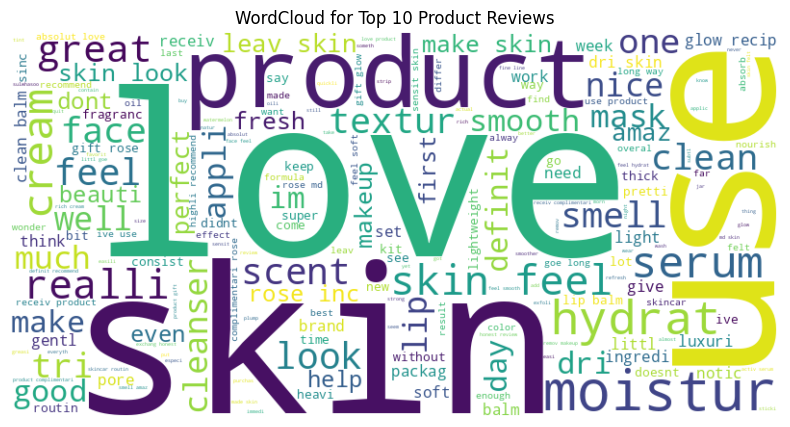

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

top10_textblob_reviews = df_updated[df_updated['product_id'].isin(top_10_textblob['product_id'])]
text = " ".join(top10_textblob_reviews['review_text'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Top 10 Product Reviews")
plt.show()


In [ ]:
# Worst 10
worst_10_textblob = sorted_sentiments_textblob.nsmallest(10, 'sentiment_score')

worst_10_textblob = worst_10_textblob.merge(data_product_info[['product_id', 'product_name', 'brand_name', 'rating',
                                         'price_usd', 'highlights',  'primary_category',
                                         'secondary_category', 'tertiary_category']], on='product_id', how='left')
worst_10_textblob

product_id  Negative  Neutral  Positive  sentiment_score  \
0    P374841        40        6        54               14   
1    P205614        36        8        56               20   
2    P472052        33       11        56               23   
3    P470259        32        7        61               29   
4    P484080        32        7        61               29   
5    P442990        30        6        64               34   
6    P461522        22       21        57               35   
7    P467971        30        5        65               35   
8    P476447        24       16        60               36   
9    P467115        25       12        63               38   

                                        product_name          brand_name  \
0             Even Better Eyes Dark Circle Corrector            CLINIQUE   
1           White Lucent Anti-Dark Circles Eye Cream            Shiseido   
2           Microneedling Dark Spot Brightening Dots           Peace Out   
3         Faded Serum for Dark Spots & Discoloration            Topicals   
4    Mini Faded Serum for Dark Spots & Discoloration            Topicals   
5  Clean Screen Mineral SPF 30 Mattifying Face Su...  REN Clean Skincare   
6                          Clean Charcoal Nose Strip  SEPHORA COLLECTION   
7                  Brightening Dark Circle Eye Cream  REN Clean Skincare   
8  Debloat+ Anti-Bloat Supplement with Digestive ...         The Nue Co.   
9        Facial Radiance Niacinamide Dark Spot Serum    First Aid Beauty   

   rating  price_usd                                         highlights  \
0  3.2428       44.0                                                NaN   
1  3.5878       65.0  ['Good for: Dullness/Uneven Texture', 'Good fo...   
2  4.0386       28.0  ['Hyaluronic Acid', 'Clean at Sephora', 'Good ...   
3  3.6634       38.0  ['Vegan', 'Good for: Dullness/Uneven Texture',...   
4  3.6634       18.0      ['Vegan', 'Clean at Sephora', 'Cruelty-Free']   
5  3.3558       40.0  ['Clean + Planet Positive', 'UV Protection', '...   
6  3.0273        3.0  ['Vegan', 'Good for: Pores', 'Clean at Sephora...   
7  4.3027       51.0  ['Good for: Dark Circles', 'Good for: Dryness'...   
8  4.2651       45.0  ['Vegan', 'Clean + Planet Positive', 'Gluten F...   
9  3.6559       42.0  ['Best for Normal Skin', 'Good for: Dark spots...   

  primary_category secondary_category        tertiary_category  
0         Skincare           Eye Care  Eye Creams & Treatments  
1         Skincare           Eye Care  Eye Creams & Treatments  
2         Skincare         Treatments              Face Serums  
3         Skincare         Treatments              Face Serums  
4         Skincare         Treatments              Face Serums  
5         Skincare          Sunscreen           Face Sunscreen  
6         Skincare              Masks              Sheet Masks  
7         Skincare           Eye Care  Eye Creams & Treatments  
8         Skincare           Wellness       Beauty Supplements  
9         Skincare         Treatments              Face Serums

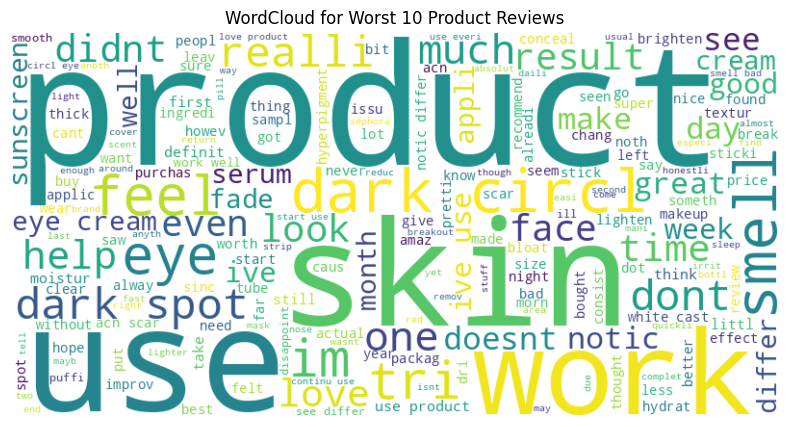

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

worst10_textblob_reviews = df_updated[df_updated['product_id'].isin(worst_10_textblob['product_id'])]
text = " ".join(worst10_textblob_reviews['review_text'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Worst 10 Product Reviews")
plt.show()


In [ ]:
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.max_colwidth', None) # Display full content of each cell
pd.set_option('display.width', 1000) # Increase the width of the output display # Display the DataFrame
print(df_updated)

        rating                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review_text product_id sentiment_vader sentiment_textblob
0            5                                                                                                                                                                                                                                                                                                                                                                  

# 5. Summarization